# **A. Data Cleaning**

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

In [145]:
df = pd.read_csv('Black_Friday.csv')

In [146]:
def clean_data(df):
  df['User_ID'] = df['User_ID'].astype('string')
  df['Product_ID'] = df['Product_ID'].astype('string')
  df['Age'] = pd.Categorical(df['Age'])
  df['Age'] = df['Age'].cat.codes
  df['Stay_In_Current_City_Years'] = pd.Categorical(df['Stay_In_Current_City_Years'])
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].cat.codes
  for key in ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']:
    if df[key].isnull().sum() < 0.5 * (len(df)):
      df[key] = df[key].replace(np.nan, df[key].mean())
    else:
      df = df.drop(columns=key)
  return df

In [147]:
df = clean_data(df)

In [148]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0,10,A,2,0,3,9.84253,8370
1,1000001,P00248942,F,0,10,A,2,0,1,6.00000,15200
2,1000001,P00087842,F,0,10,A,2,0,12,9.84253,1422
3,1000001,P00085442,F,0,10,A,2,0,12,14.00000,1057
4,1000002,P00285442,M,6,16,C,4,0,8,9.84253,7969
5,1000003,P00193542,M,2,15,A,3,0,1,2.00000,15227
6,1000004,P00184942,M,4,7,B,2,1,1,8.00000,19215
7,1000004,P00346142,M,4,7,B,2,1,1,15.00000,15854
8,1000004,P0097242,M,4,7,B,2,1,1,16.00000,15686
9,1000005,P00274942,M,2,20,A,1,1,8,9.84253,7871


# **B. Data Analysis**



1.   Compare number of customers, and total amount of purchase for each gender? Is this a balance
dataset with respect to gender? (5%)
2.   Compare total amount of purchase for different cities. (5%)
3. Compare total amount of purchase for combinations of gender and age. Which gender and age
is better target for marketing campaign? (5%)
4. Using box and whisker plot, compare distribution of purchase amounts among combinations of
genders and age. (5%)
5. Using box and whisker plot, compare distribution of purchase amounts among different
occupations. (5%)
6. (Optional) Create a heatmap or scatter plot showing correlation matrix of all of two numerical
features. Which features are positively correlated with purchase amount? (+10%)


**1**

In [149]:
df.groupby(by = ['Gender']).sum()

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
Gender,,,,,,,
F,306850.0,826093,223372.0,51141,685678,1.219143e+06,1078358205
M,935479.0,3199225,702715.0,152405,1952462,3.682397e+06,3568533248


In [150]:
print('There are 306850 female customers and 935479 male customers. The total amount of purchase from female customers are 1078358205 and total amount of purchase from male customers is almost three times as the former, which is 3568533248. Therefore, it is not a balance dataset with respect to gender')

There are 306850 female customers and 935479 male customers. The total amount of purchase from female customers are 1078358205 and total amount of purchase from male customers is almost three times as the former, which is 3568533248. Therefore, it is not a balance dataset with respect to gender


**2**

In [151]:
df.groupby(by = ['City_Category']).sum()

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
City_Category,,,,,,,
A,305885.0,1054480,242915.0,51155,729146,1.328584e+06,1200686706
B,517685.0,1670972,393414.0,85473,1112042,2.062119e+06,1928963340
C,418759.0,1299866,289758.0,66918,796952,1.510838e+06,1517241407


In [152]:
print('Total amount of purchase for City A, B, C are 1200686706, 1928963340 and 1517241407 respectively')

Total amount of purchase for City A, B, C are 1200686706, 1928963340 and 1517241407 respectively


**3**

In [153]:
df_3 = df.groupby(by = ['Gender', 'Age'],as_index=False).sum()
df_3

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0,38083,8068.0,0,24003,4.177107e+04,38858341
1,F,1,133324,39117.0,5667,119367,2.162965e+05,187842163
2,F,2,296941,87050.0,18449,254587,4.563167e+05,400580225
3,F,3,189776,47030.0,9381,138122,2.450980e+05,221952029
4,F,4,73663,17943.0,9063,68651,1.204793e+05,105771109
5,F,5,60795,15862.0,5727,52541,9.133061e+04,81836929
6,F,6,33511,8302.0,2854,28407,4.785098e+04,41517409
7,M,0,82149,16246.0,0,43451,8.463755e+04,84500331
8,M,1,476749,126224.0,13498,334211,6.522563e+05,649284767
9,M,2,1272841,289450.0,59361,781803,1.494455e+06,1448558028


In [154]:
print('Better targets are female whose age are in 26-35 and male whose age are in 26-35 as well. In a word, people between 26 and 35 are the best targets for marketing compaign.')

Better targets are female whose age are in 26-35 and male whose age are in 26-35 as well. In a word, people between 26 and 35 are the best targets for marketing compaign.


**4**

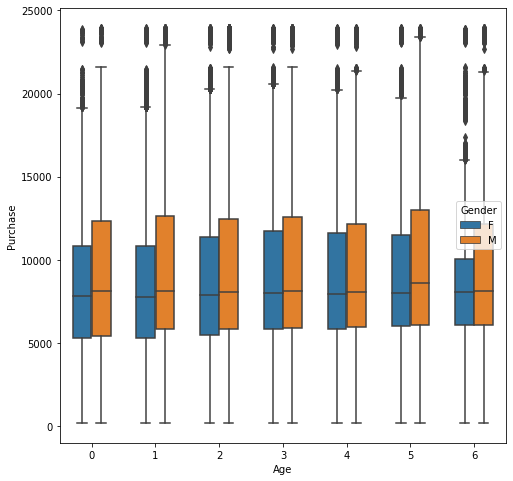

In [155]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Purchase', x='Age', data=df, hue='Gender',width=0.6)
plt.show()

**5**

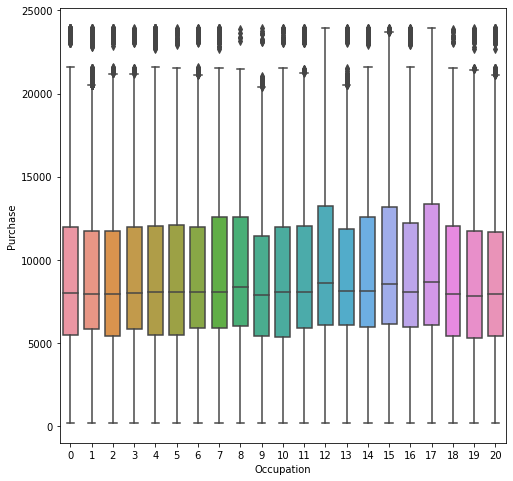

In [156]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Purchase', x='Occupation', data=df, width=0.7)
plt.show()

**6.(Optional) Create a heatmap or scatter plot showing correlation matrix of all of two numerical features. Which features are positively correlated with purchase amount? (+10%)**

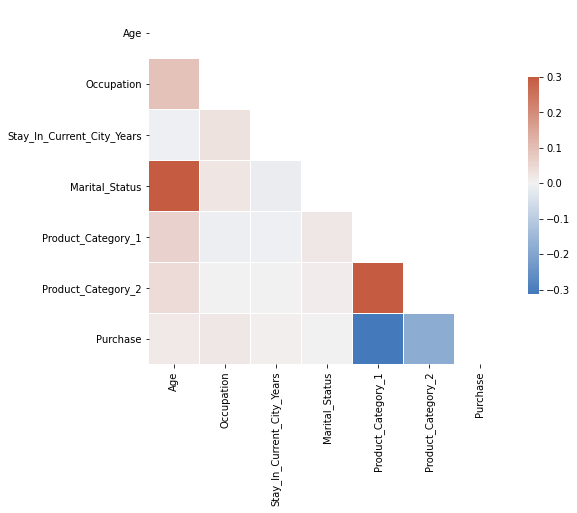

In [157]:
df_corr = df
corr = df_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0, square=True, linewidths=0.1, cbar_kws={"shrink": 0.5})

# **C. Data Modeling**

## **1.1 Dummy Variable**

In [158]:
dummy_gender = pd.get_dummies(df['Gender'])
dummy_city = pd.get_dummies(df['City_Category'])
df = df.merge(dummy_gender, left_index=True, right_index=True)
df = df.merge(dummy_city, left_index=True, right_index=True)
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,M,A,B,C
0,1000001,P00069042,F,0,10,A,2,0,3,9.84253,8370,1,0,1,0,0
1,1000001,P00248942,F,0,10,A,2,0,1,6.00000,15200,1,0,1,0,0
2,1000001,P00087842,F,0,10,A,2,0,12,9.84253,1422,1,0,1,0,0
3,1000001,P00085442,F,0,10,A,2,0,12,14.00000,1057,1,0,1,0,0
4,1000002,P00285442,M,6,16,C,4,0,8,9.84253,7969,0,1,0,0,1
5,1000003,P00193542,M,2,15,A,3,0,1,2.00000,15227,0,1,1,0,0
6,1000004,P00184942,M,4,7,B,2,1,1,8.00000,19215,0,1,0,1,0
7,1000004,P00346142,M,4,7,B,2,1,1,15.00000,15854,0,1,0,1,0
8,1000004,P0097242,M,4,7,B,2,1,1,16.00000,15686,0,1,0,1,0
9,1000005,P00274942,M,2,20,A,1,1,8,9.84253,7871,0,1,1,0,0


## **1.2 Normalization**

In [159]:
df2 = df
df2 = df2.drop(columns = ['Product_ID','User_ID','Gender','City_Category'])

In [160]:
def normalize(df):
  result = df
  for key in df.columns:
    if key != 'Purchase':
      max = df[key].max()
      min = df[key].min()
      result[key] = (df[key] - min) / (max - min)
  return result

In [161]:
df2 = normalize(df2)

In [162]:
df2.head(10)

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,M,A,B,C
0,0.000000,0.50,0.50,0.0,0.117647,0.490158,8370,1.0,0.0,1.0,0.0,0.0
1,0.000000,0.50,0.50,0.0,0.000000,0.250000,15200,1.0,0.0,1.0,0.0,0.0
2,0.000000,0.50,0.50,0.0,0.647059,0.490158,1422,1.0,0.0,1.0,0.0,0.0
3,0.000000,0.50,0.50,0.0,0.647059,0.750000,1057,1.0,0.0,1.0,0.0,0.0
4,1.000000,0.80,1.00,0.0,0.411765,0.490158,7969,0.0,1.0,0.0,0.0,1.0
5,0.333333,0.75,0.75,0.0,0.000000,0.000000,15227,0.0,1.0,1.0,0.0,0.0
6,0.666667,0.35,0.50,1.0,0.000000,0.375000,19215,0.0,1.0,0.0,1.0,0.0
7,0.666667,0.35,0.50,1.0,0.000000,0.812500,15854,0.0,1.0,0.0,1.0,0.0
8,0.666667,0.35,0.50,1.0,0.000000,0.875000,15686,0.0,1.0,0.0,1.0,0.0
9,0.333333,1.00,0.25,1.0,0.411765,0.490158,7871,0.0,1.0,1.0,0.0,0.0


## **2. linear regression model**

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [164]:
df2.head(5)

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,M,A,B,C
0,0.0,0.5,0.5,0.0,0.117647,0.490158,8370,1.0,0.0,1.0,0.0,0.0
1,0.0,0.5,0.5,0.0,0.000000,0.250000,15200,1.0,0.0,1.0,0.0,0.0
2,0.0,0.5,0.5,0.0,0.647059,0.490158,1422,1.0,0.0,1.0,0.0,0.0
3,0.0,0.5,0.5,0.0,0.647059,0.750000,1057,1.0,0.0,1.0,0.0,0.0
4,1.0,0.8,1.0,0.0,0.411765,0.490158,7969,0.0,1.0,0.0,0.0,1.0


In [165]:
def split_standard(df, target, test_size, random_state):
 
  X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target], test_size=test_size, random_state=random_state)
  SS = StandardScaler()
  X_train = SS.fit_transform(X_train)  
  X_test = SS.transform(X_test) 

  
  X_train = pd.DataFrame(X_train, columns=df.columns.values[:-1]).set_index(y_train.index)  
  X_test = pd.DataFrame(X_test, columns=df.columns.values[:-1]).set_index(y_test.index)  

  return X_train, X_test, y_train, y_test

In [166]:
X_train, X_test, y_train, y_test = split_standard(df2, 'Purchase', test_size=0.2, random_state=0)

In [167]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [168]:
print('Coefficients: {}'.format(model.coef_))
print('Intercept: {}'.format(model.intercept_))
print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error (MAE): {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('Coefficient of determination (R^2): {:.2f}'.format(r2_score(y_test, y_pred)))

Coefficients: [  158.08180407    45.07684981     7.7845294    -24.95739983
 -1418.01624061  -344.78948327  -112.7716105    112.7716105
  -128.49615097   -64.12944338   191.79980575]
Intercept: 9325.777826584605
Mean squared error (MSE): 22083040.50
Mean absolute error (MAE): 3607.48
Coefficient of determination (R^2): 0.11


## **3. Final Model Evaluation**

In [169]:
df_test = pd.read_csv('Black_Friday_Final_Test.csv')
df_test = clean_data(df_test)
df_test.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1004655,P00031042,F,2,1,A,3,0,8,9.837301,10006
1,1004655,P00303042,F,2,1,A,3,0,5,9.837301,5152
2,1004655,P00085442,F,2,1,A,3,0,12,14.000000,1430
3,1004655,P00058142,F,2,1,A,3,0,3,4.000000,11063
4,1004655,P00316742,F,2,1,A,3,0,4,5.000000,2070
5,1004655,P00042742,F,2,1,A,3,0,5,14.000000,7005
6,1004655,P00247042,F,2,1,A,3,0,5,14.000000,5403
7,1004655,P00127642,F,2,1,A,3,0,1,2.000000,15692
8,1004656,P00139942,M,2,17,B,4,0,5,9.837301,7065
9,1004656,P00028842,M,2,17,B,4,0,6,8.000000,19938


In [170]:
dummy_gender = pd.get_dummies(df_test['Gender'])
dummy_city = pd.get_dummies(df_test['City_Category'])
df_test = df_test.merge(dummy_gender, left_index=True, right_index=True)
df_test = df_test.merge(dummy_city, left_index=True, right_index=True)
df_test.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,M,A,B,C
0,1004655,P00031042,F,2,1,A,3,0,8,9.837301,10006,1,0,1,0,0
1,1004655,P00303042,F,2,1,A,3,0,5,9.837301,5152,1,0,1,0,0
2,1004655,P00085442,F,2,1,A,3,0,12,14.000000,1430,1,0,1,0,0
3,1004655,P00058142,F,2,1,A,3,0,3,4.000000,11063,1,0,1,0,0
4,1004655,P00316742,F,2,1,A,3,0,4,5.000000,2070,1,0,1,0,0
5,1004655,P00042742,F,2,1,A,3,0,5,14.000000,7005,1,0,1,0,0
6,1004655,P00247042,F,2,1,A,3,0,5,14.000000,5403,1,0,1,0,0
7,1004655,P00127642,F,2,1,A,3,0,1,2.000000,15692,1,0,1,0,0
8,1004656,P00139942,M,2,17,B,4,0,5,9.837301,7065,0,1,0,1,0
9,1004656,P00028842,M,2,17,B,4,0,6,8.000000,19938,0,1,0,1,0


In [171]:
df_test2 = df_test
df_test2 = df_test2.drop(columns = ['Product_ID','User_ID','Gender','City_Category'])

In [172]:
df_test2 = normalize(df_test2)

In [173]:
X_train2, X_test2, y_train2, y_test2 = split_standard(df_test2, 'Purchase', test_size=0.2, random_state=0)

In [174]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [175]:
print('Coefficients: {}'.format(model2.coef_))
print('Intercept: {}'.format(model2.intercept_))
print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test2, y_pred2)))
print('Mean absolute error (MAE): {:.2f}'.format(mean_absolute_error(y_test2, y_pred2)))
print('Coefficient of determination (R^2): {:.2f}'.format(r2_score(y_test2, y_pred2)))

Coefficients: [ 1.89095251e+02  5.44800776e+01  7.07406155e+00 -1.10675286e+01
 -1.45515379e+03 -3.77479095e+02  8.35961375e+13  8.35961375e+13
 -1.44732941e+16 -1.61066422e+16 -1.50863281e+16]
Intercept: 9382.219295442163
Mean squared error (MSE): 21444038.76
Mean absolute error (MAE): 3576.51
Coefficient of determination (R^2): 0.12
